# Keras MNIST Model

The model is based on the first default image classifier model created by AutoKeras

In [1]:
!pip3 install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 29.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dropout, Flatten, Dense
from tensorflow.keras.layers.experimental.preprocessing import Normalization

inputs = Input(shape=(28, 28, 1))
outputs = Normalization()(inputs)
outputs = Dropout(0.25)(outputs)
outputs = Conv2D(filters=32, kernel_size=3, activation='relu')(outputs)
outputs = Conv2D(filters=64, kernel_size=3, activation='relu')(outputs)
outputs = MaxPooling2D(pool_size=(2, 2))(outputs)
outputs = Flatten()(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(10, activation='softmax')(outputs)

model = Model(inputs=inputs, outputs=outputs)
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 normalization (Normalizati  (None, 28, 28, 1)         3         
 on)                                                             
                                                                 
 dropout (Dropout)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                          

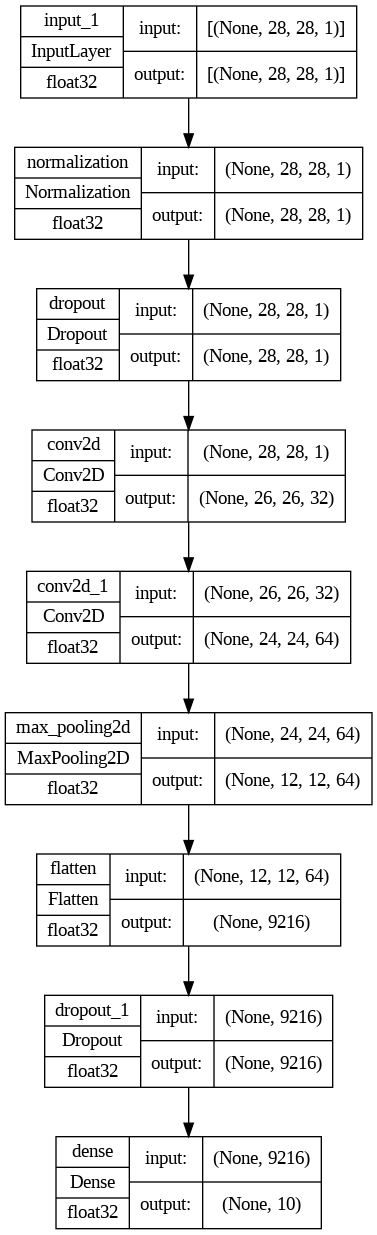

In [4]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

In [5]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='mnist',
        save_weights_only=True,
        save_best_only=True,
        monitor='val_accuracy',
        mode='max'),
    tf.keras.callbacks.EarlyStopping(patience=10)
]

model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=1000, batch_size=32, callbacks=callbacks)

Epoch 1/1000
1500/1500 [==============================] - 92s 61ms/step - loss: 0.6088 - accuracy: 0.8996 - val_loss: 0.1053 - val_accuracy: 0.9690
Epoch 2/1000
1500/1500 [==============================] - 84s 56ms/step - loss: 0.1809 - accuracy: 0.9456 - val_loss: 0.0980 - val_accuracy: 0.9707
Epoch 3/1000
1500/1500 [==============================] - 79s 53ms/step - loss: 0.1441 - accuracy: 0.9567 - val_loss: 0.0806 - val_accuracy: 0.9770
Epoch 4/1000
1500/1500 [==============================] - 87s 58ms/step - loss: 0.1319 - accuracy: 0.9597 - val_loss: 0.0803 - val_accuracy: 0.9768
Epoch 5/1000
1500/1500 [==============================] - 80s 53ms/step - loss: 0.1194 - accuracy: 0.9627 - val_loss: 0.0687 - val_accuracy: 0.9803
Epoch 6/1000
1500/1500 [==============================] - 91s 60ms/step - loss: 0.1133 - accuracy: 0.9645 - val_loss: 0.0782 - val_accuracy: 0.9769
Epoch 7/1000
1500/1500 [==============================] - 85s 57ms/step - loss: 0.1061 - accuracy: 0.9667 - val_

In [6]:
model.load_weights('mnist')

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.0522 - accuracy: 0.9845


[0.0521770678460598, 0.984499990940094]

In [8]:
y_test = y_test.argmax(axis=1)
predicted = model.predict(x_test).argmax(axis=1)

predicted

313/313 [==============================] - 5s 14ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



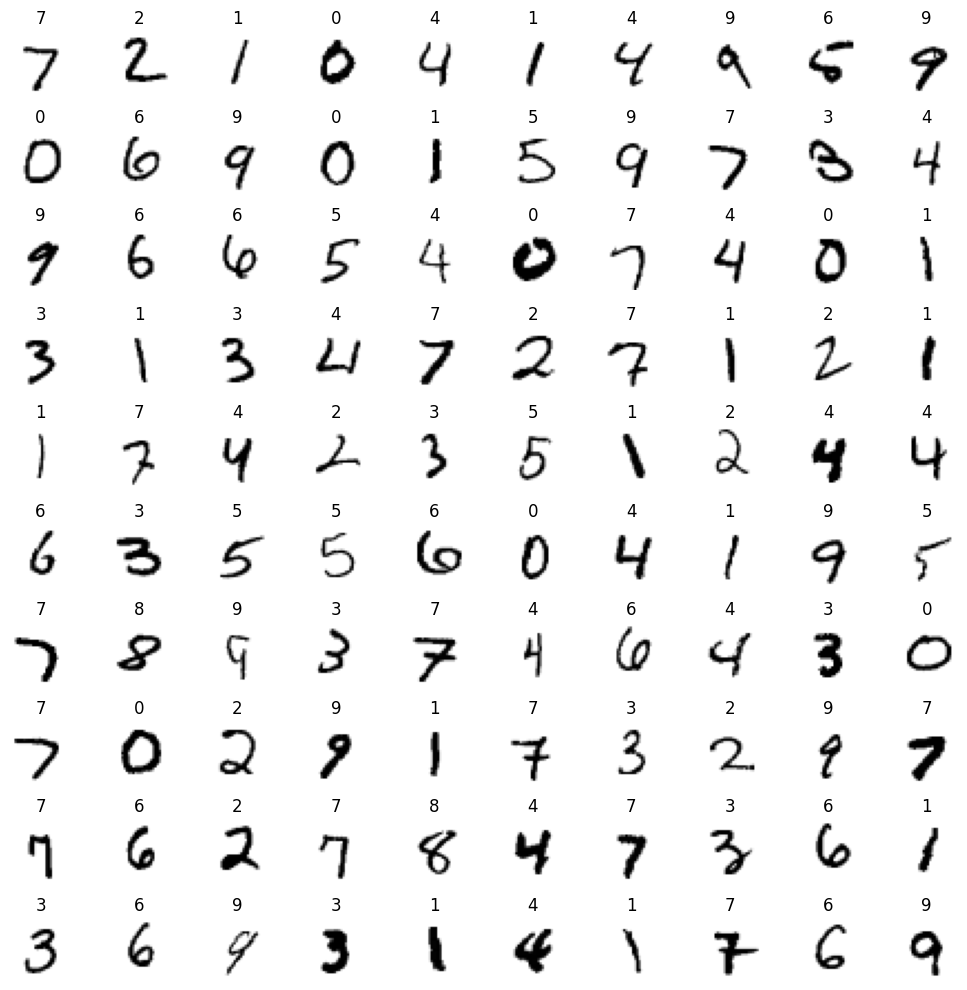

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1)
    ax.set_axis_off()
    plt.imshow(x_test[i], cmap='binary')
    ax.set_title(f'{predicted[i]}')

plt.tight_layout()
plt.show()

In [11]:
model.save('./mnist_model')